## Álgebra lineal

El módulo de álgebra lineal se solapa un poco con funciones similares en **Numpy**. Ambos usan finalmente una implementación de bibliotecas conocidas (LAPACK, BLAS). La diferencia es que **Scipy** asegura que utiliza las optimizaciones de la librería ATLAS y presenta algunos métodos y algoritmos que no están presentes en **Numpy**. 

Una de las aplicaciones más conocidas por nosotros es la rotación de vectores. Como bien sabemos rotar un vector es equivalente a multiplicarlo por la matriz de rotación correspondiente. Esquemáticamente:


![](https://imgs.xkcd.com/comics/matrix_transform.png)

(Gentileza de [xkcd](https://www.xkcd.com/184/))

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import linalg

Este módulo tiene funciones para trabajar con matrices, descriptas como *arrays* bidimensionales.

In [4]:
arr = np.array([[3, 2,1],[6, 4,1],[12, 8, 13.3]])
print(arr)

[[ 3.   2.   1. ]
 [ 6.   4.   1. ]
 [12.   8.  13.3]]


In [5]:
A = np.array([[1, -2,-3],[1, -1,-1],[-1, 3, 1]])
print(A)

[[ 1 -2 -3]
 [ 1 -1 -1]
 [-1  3  1]]


In [6]:
# La matriz transpuesta
A.T

array([[ 1,  1, -1],
       [-2, -1,  3],
       [-3, -1,  1]])

### Productos y normas

#### Norma de un vector

La norma está dada por
$$||v|| = \sqrt{v_1^2+...+v_n^2}$$ 

In [7]:
v = np.array([2,1,3])
linalg.norm(v)                  # Norma

3.7416573867739413

In [8]:
linalg.norm(v) == np.sqrt(np.sum(np.square(v)))

True

#### Producto interno

El producto entre una matriz y un vector está definido en **Numpy** mediante las funciones `dot()`, o `matmul()`, o mediante el operador `@`:

In [9]:
w1 = np.dot(A, v)                # Multiplicación de matrices
w1

array([-9, -2,  4])

In [10]:
np.allclose(np.dot(A,v), np.matmul(A,v))  # dot y matmul son equivalentes

True

In [11]:
np.allclose(A @ v, np.matmul(A,v))  # También son equivalentes al operador @

True

In [12]:
w2 = np.dot(v,  A)
w2

array([ 0,  4, -4])

In [13]:
np.dot(v.T,  A) == np.dot(v,  A)  # Si es unidimensional, el vector se transpone automáticamente


array([ True,  True,  True])

In [14]:
print(v.shape, A.shape)

(3,) (3, 3)


El producto interno entre vectores se calcula de la misma manera
$$ \langle v, w \rangle$$

In [15]:
np.dot(v,w1)

-8

y está relacionado con la norma
$$||v|| = \sqrt{ \langle v, v \rangle}$$

In [16]:
linalg.norm(v) == np.sqrt(np.dot(v,v))

True

In [17]:
np.dot(v,A)

array([ 0,  4, -4])

In [18]:
v.shape

(3,)

In [19]:
v2 = np.reshape(v, (3,1))

In [20]:
v2.shape

(3, 1)

In [22]:
v2

array([[2],
       [1],
       [3]])

In [21]:
np.dot(A, v2)

array([[-9],
       [-2],
       [ 4]])

In [23]:
np.dot(A, v2).shape

(3, 1)

Ahora las dimensiones de `v2` y `A` no coinciden para hacer el producto matricial
```python
np.dot(v2, A)
```

In [24]:
np.dot( v2,A)

ValueError: shapes (3,1) and (3,3) not aligned: 1 (dim 1) != 3 (dim 0)

In [25]:
np.dot(v2.T, A)

array([[ 0,  4, -4]])

Notemos que el producto interno se puede pensar como un producto de matrices. En este caso, el producto de una matriz de 3x1, por otra de 1x3:

$$ v^{t} \, w = \begin{pmatrix} -9&-2&4 \end{pmatrix} \begin{pmatrix} 2\\1\\3 \end{pmatrix} $$

donde estamos pensando al vector como columna.

#### Producto exterior

El producto exterior puede ponerse en términos de multiplicación de matrices como
$$v\otimes w = vw^{t} = \begin{pmatrix} -9\\-2\\4 \end{pmatrix} \begin{pmatrix} 2&1&3 \end{pmatrix}$$

In [29]:
oprod = np.outer(w1,v)
print(oprod)

[[-18  -9 -27]
 [ -4  -2  -6]
 [  8   4  12]]


### Aplicación a la resolución de sistemas de ecuaciones

Vamos a usar `scipy.linalg` permite obtener determinantes e inversas de matrices. Veamos como resolver un sistema de ecuaciones lineales:

$$
\left\{
\begin{array}{rl}
a_{11} x_1 + a_{12} x_2 + a_{13} x_3 &= b_1 \\
a_{21} x_1 + a_{22} x_2 + a_{23} x_3 &= b_2 \\
a_{31} x_1 + a_{32} x_2 + a_{33} x_3 &= b_3
\end{array}
\right.
$$

Esta ecuación se puede escribir en forma matricial como

$$ \begin{pmatrix}a_{11}&a_{12} & a_{13}\\a_{21}&a_{22}&a_{23}\\a_{31}&a_{32}&a_{33}\end{pmatrix}
\begin{pmatrix}x_1\\x_2\\x_3\end{pmatrix} = \begin{pmatrix}b_1\\b_2\\b_3\end{pmatrix}
$$

Veamos un ejemplo concreto. Supongamos que tenemos el siguiente sistema
$$
\left\{
\begin{array}{rl}
 x_1 + 2 x_2 + 3 x_3 &= 1 \\
2 x_1 +  x_2 + 3 x_3 &= 2 \\
4 x_1 +  x_2 - x_3 &= 3
\end{array}
\right.
$$
por lo que, en forma matricial será:
$$ A = \begin{pmatrix} 1 &2 &3 \\ 2& 1& 3 \\ 4& 1& -1 \end{pmatrix} $$
y 
$$ b =  \begin{pmatrix} 1 \\ 2 \\ 3 \end{pmatrix} $$

In [31]:
A = np.array([[1,2,3],[2,1,3],[4,1,-1]])
b = np.array([[1,2,3]]).T
print('A=', A,"\n")
print('b=', b,"\n")

A= [[ 1  2  3]
 [ 2  1  3]
 [ 4  1 -1]] 

b= [[1]
 [2]
 [3]] 



In [32]:
x = np.dot(linalg.inv(A), b)
print('Resultado:\n', x)

Resultado:
 [[ 0.83333333]
 [-0.16666667]
 [ 0.16666667]]


### Descomposición de matrices

Si consideramos el mismo problema de resolución de ecuaciones
$$A x = b $$
pero donde debemos resolver el problema para un valor dado de los coeficientes (la matriz $A$) y muchos valores distintos del vector $b$, suele ser útil realizar lo que se llama la descompocición $LU$ de la matriz.

Si escribimos a la matriz $A$ como el producto de tres matrices $A = PLU$ donde $P$ es una permutación de las filas, $L$ es una matriz triangular inferior (Los elementos por encima de la diagonal son nulos) y $U$ una triangular superior.
En este caso los dos sistemas:
$$ Ax = b \qquad  \mathrm{ y } \qquad P A x = Pb  $$
tienen la misma solución. Entonces podemos resolver el sistema en dos pasos:

$$ Ly=b $$ 
con
$$ y = Ux. $$

En ese caso, resolvemos una sola vez la descompocición $LU$, y luego ambas ecuaciones se pueden resolver eficientemente debido a la forma de las matrices.

In [33]:
A = np.array([[1,3,4],[2,1,3],[4,1,2]])

print('A=', A,"\n")

P, L, U = linalg.lu(A)
print("PLU=", np.dot(P, np.dot(L, U)))
print("\nLU=", np.dot(L, U))
print("\nL=",L)
print("\nU=", U)

A= [[1 3 4]
 [2 1 3]
 [4 1 2]] 

PLU= [[1. 3. 4.]
 [2. 1. 3.]
 [4. 1. 2.]]

LU= [[4. 1. 2.]
 [1. 3. 4.]
 [2. 1. 3.]]

L= [[1.         0.         0.        ]
 [0.25       1.         0.        ]
 [0.5        0.18181818 1.        ]]

U= [[4.         1.         2.        ]
 [0.         2.75       3.5       ]
 [0.         0.         1.36363636]]


### Autovalores y autovectores

La necesidad de encontrar los autovalores y autovectores de una matriz aparece en muchos problemas de física e ingeniería. Se trata de encontrar el escalar $\lambda$ y el vector (no nulo) $v$ tales que

$$ A v = \lambda v$$



In [34]:
with np.printoptions(precision=3):
  B = np.array([[0,1.,1],[2,1,0], [3,4,5]])
  print(B,'\n')
  u, v = linalg.eig(B)
  c = np.dot(v,np.dot(np.diag(u), linalg.inv(v)))
  print(c,'\n')
  print(np.real_if_close(c),'\n')
  print('')
  print('Autovalores=', u,'\n')
  print('Autovalores=', np.real_if_close(u))

[[0. 1. 1.]
 [2. 1. 0.]
 [3. 4. 5.]] 

[[ 6.572e-16+0.j  1.000e+00+0.j  1.000e+00+0.j]
 [ 2.000e+00+0.j  1.000e+00+0.j -1.260e-16+0.j]
 [ 3.000e+00+0.j  4.000e+00+0.j  5.000e+00+0.j]] 

[[ 6.572e-16  1.000e+00  1.000e+00]
 [ 2.000e+00  1.000e+00 -1.260e-16]
 [ 3.000e+00  4.000e+00  5.000e+00]] 


Autovalores= [ 5.854+0.j -0.854+0.j  1.   +0.j] 

Autovalores= [ 5.854 -0.854  1.   ]



Veamos como funciona para la matriz definida anteriormente

In [35]:
print(A)
u, v = linalg.eig(A)
print(np.real_if_close(np.dot(v,np.dot(np.diag(u), linalg.inv(v)))))
print("Autovalores=" , np.real_if_close(u))
print("Autovectores=", np.real_if_close(v))

[[1 3 4]
 [2 1 3]
 [4 1 2]]
[[1. 3. 4.]
 [2. 1. 3.]
 [4. 1. 2.]]
Autovalores= [ 7.10977223 -2.10977223 -1.        ]
Autovectores= [[-0.63273853 -0.66101705 -0.33333333]
 [-0.49820655 -0.25550401 -0.66666667]
 [-0.59281716  0.70553112  0.66666667]]


In [39]:
v[0] @ v[1], np.dot(v[1],v[2])  # Autovectores no ortogonales

(0.7063492063492062, -0.32936507936507925)

### Rutinas de resolución de ecuaciones lineales

**Scipy** tiene además de las rutinas de trabajo con matrices, rutinas de resolución de sistemas de ecuaciones. En particular la función `solve()`

```python
 solve(a, b, sym_pos=False, lower=False, overwrite_a=False, overwrite_b=False,
       debug=False, check_finite=True)

Solve the equation ``a x = b`` for ``x``.

Parameters
----------
a : (M, M) array_like
    A square matrix.
b : (M,) or (M, N) array_like
    Right-hand side matrix in ``a x = b``.
...
```

In [40]:
a = np.array([[3, 2, 0], [1, -1, 0], [0, 5, 1]])
b = np.array([2, 4, -1])
x = linalg.solve(a, b)
x

array([ 2., -2.,  9.])

In [42]:
np.allclose(a @ x , b)

True

In [43]:
np.dot(a,x) == b

array([ True,  True,  True])

Para sistemas de ecuaciones grandes, la función `solve()` es más rápida que invertir la matriz

In [48]:
A1 = np.random.random((3000,3000))
b1 = np.random.random(3000)

In [49]:
%timeit linalg.solve(A1,b1)

546 ms ± 76.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [50]:
%timeit np.dot(linalg.inv(A1),b1)

1.18 s ± 100 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


## Entrada y salida de datos

### Entrada/salida con *Numpy*

#### Datos en formato texto

Veamos un ejemplo (apenas) más complicado, de un archivo en formato de texto, donde antes de la lista de números hay un encabezado

In [51]:
import numpy as np
import matplotlib.pyplot as plt

In [52]:
!head ../data/tof_signal_5.dat

# tiempo    cuentas
4.953125e-06 -7.940000e-05
4.963125e-06 -5.930000e-05
4.973125e-06 -8.945000e-05
4.983125e-06 -7.940000e-05
4.993125e-06 -6.935000e-05
5.003125e-06 -6.935000e-05
5.013125e-06 -9.950000e-05
5.023125e-06 -5.930000e-05
5.033125e-06 -5.930000e-05


In [53]:
X0 = np.loadtxt('../data/tof_signal_5.dat')

In [54]:
X0.shape, type(X0)

((1000, 2), numpy.ndarray)

In [55]:
X0[0].shape

(2,)

In [56]:
X0[0]

array([ 4.953125e-06, -7.940000e-05])

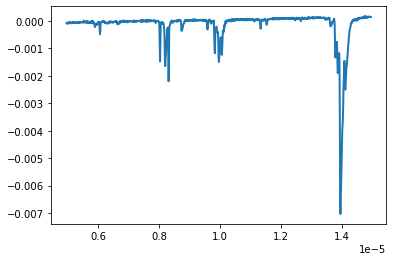

In [57]:
plt.plot(X0[:,0], X0[:,1])

La manera más simple de leer datos de un archivo es a través de `loadtxt()`.

```python
np.info(np.loadtxt)
 loadtxt(fname, dtype=<class 'float'>, comments='#', delimiter=None,
         converters=None, skiprows=0, usecols=None, unpack=False, ndmin=0,
         encoding='bytes')
Load data from a text file.

Each row in the text file must have the same number of values.
```

En su forma más simple sólo necesita como argumento el nombre del archivo. En este caso, había una primera línea que fue ignorada porque empieza con el caracter "#" que indica que la línea es un comentario.

Veamos otro ejemplo, donde las líneas que son parte de un encabezado se saltean, utilizando el argumento `skiprows`

In [58]:
fdatos= '../data/exper_col.dat'
!head ../data/exper_col.dat

In [59]:
X1 = np.loadtxt(fdatos, skiprows=5)
print(X1.shape)
print(X1[0])

(76, 4)
[ 9.901      15.35198465 12.12121212 14.86049333]


Como el archivo tiene cuatro columnas el array `X` tiene dimensiones `(74, 4)` correspondiente a las 74 filas y las 4 columnas. Si sólo necesitamos un grupo de estos datos podemos utilizar el argumento `usecols = (c1, c2)` que nos permite elegir cuáles son las columnas a leer:

In [60]:
x, y = np.loadtxt(fdatos, skiprows=5, usecols=[0, 2], unpack=True)
print (x.size, y.size)

76 76


In [65]:
Y = np.loadtxt(fdatos, skiprows=5, usecols=[0, 2])
print (Y.size, Y[0], Y.shape)

152 [ 9.901      12.12121212] (76, 2)


En este ejemplo, mediante el argumento `unpack=True`, le indicamos a la función `loadtxt`que desempaque lo que lee en variables diferentes (`x,y` en este caso)

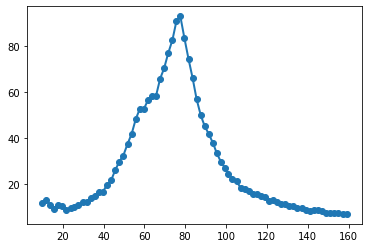

In [62]:
plt.plot(x,y, 'o-')

Como numpy se especializa en manejar números, tiene muchas funciones para crear arrays a partir de información numérica a partir de texto o archivos (como los CSV, por ejemplo). Ya vimos como leer datos con `loadtxt`. También se pueden generar desde un string:

In [63]:
np.fromstring(u"1.0 2.3   3.0 4.1   -3.1", sep=" ", dtype=float)

array([ 1. ,  2.3,  3. ,  4.1, -3.1])

Para guardar datos en formato texto podemos usar, de la misma manera,

In [64]:
Y = np.vstack((x,y)).T
print(Y.shape)

(76, 2)


In [66]:
np.savetxt('tmp.dat', Y)

In [67]:
!head tmp.dat

9.900999999999999801e+00 1.212121212121209979e+01
1.188100000000000023e+01 1.338496506439940070e+01
1.379299999999999926e+01 1.101369465980729956e+01
1.581300000000000061e+01 9.490067063140580572e+00
1.780199999999999960e+01 1.106306508676360068e+01
1.978399999999999892e+01 1.056836569579290064e+01
2.180600000000000094e+01 9.041259351048690718e+00
2.380199999999999960e+01 9.743805123897519849e+00
2.567999999999999972e+01 1.000583998442670008e+01
2.769900000000000162e+01 1.093034161826770045e+01


La función `savetxt()`tiene varios argumentos opcionales:

```python
np.savetxt(fname, X, fmt='%.18e', delimiter=' ', newline='\n', header='', footer='', comments='# ', encoding=None)
```

Por ejemplo, podemos darle un formato de salida con el argumento `fmt`, y darle un encabezado con `header`

In [ ]:
np.savetxt('tmp.dat', Y, fmt='%.6g', header="Energ Exper")
!head tmp.dat

#### Datos en formato binario

In [70]:
z = np.random.random(100) + 1j* np.random.random(100)
np.savetxt('complejos.dat', z)

In [74]:
zz = np.loadtxt('complejos.dat', converters=complex)

AttributeError: type object 'complex' has no attribute 'items'

In [75]:
np.save('complejos.npy',z)
zz = np.load('complejos.npy')

In [77]:
np.allclose(zz, z)

True

In [78]:
np.save('test.npy', X1)  # Grabamos el array a archivo 
X2 = np.load('test.npy')     # Y lo leemos

In [79]:
# Veamos si alguno de los elementos difiere
print('X1=', X1[:10])
print('X2=', X2[:10])

X1= [[ 9.901      15.35198465 12.12121212 14.86049333]
 [11.881      17.25443986 13.38496506 12.137559  ]
 [13.793      17.54513159 11.01369466 12.33403468]
 [15.813      14.67147284  9.49006706 10.68943707]
 [17.802      15.05448826 11.06306509 11.11859838]
 [19.784      12.99029519 10.5683657  10.77717061]
 [21.806      12.19847748  9.04125935 10.50844347]
 [23.802      13.57028821  9.74380512 10.46262448]
 [25.68       13.16199377 10.00583998  9.76919784]
 [27.699      14.91028557 10.93034162 11.29189365]]
X2= [[ 9.901      15.35198465 12.12121212 14.86049333]
 [11.881      17.25443986 13.38496506 12.137559  ]
 [13.793      17.54513159 11.01369466 12.33403468]
 [15.813      14.67147284  9.49006706 10.68943707]
 [17.802      15.05448826 11.06306509 11.11859838]
 [19.784      12.99029519 10.5683657  10.77717061]
 [21.806      12.19847748  9.04125935 10.50844347]
 [23.802      13.57028821  9.74380512 10.46262448]
 [25.68       13.16199377 10.00583998  9.76919784]
 [27.699      14.91028

In [80]:
print('¿Alguna differencia?', np.any(X1-X2))

¿Alguna differencia? False


### Ejemplo de análisis de palabras

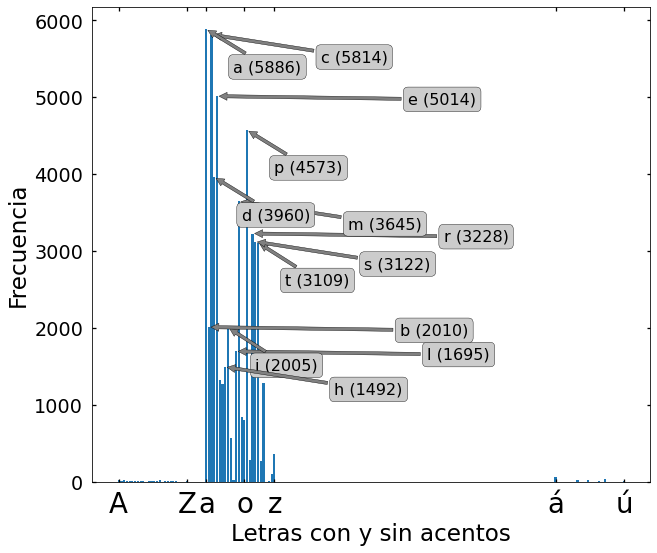

In [81]:
# %load scripts/10_palabras.py
#! /usr/bin/ipython
import numpy as np
import matplotlib.pyplot as plt
import gzip
ifiname = '../data/palabras.words.gz'

letras = [0] * 512
with gzip.open(ifiname, mode='r') as fi:
  for l in fi.readlines():
    c = ord(l.decode('utf-8')[0])
    letras[c] += 1

nmax = np.nonzero(letras)[0].max() + 1
z = np.array(letras[:nmax])
# nmin = z.nonzero()[0].min()     # Máximo valor diferente de cero
nmin = np.argwhere(z != 0).min()
#plt.ion()
with plt.style.context(['seaborn-talk', 'presentation']):
  fig = plt.figure(figsize=(10, 8))
  #plt.clf()
  plt.bar(np.arange(nmin, nmax), z[nmin:nmax])
  plt.xlabel('Letras con y sin acentos')
  plt.ylabel('Frecuencia')

  labels = ['A', 'Z', 'a', 'o', 'z', 'á', 'ú']
  ll = [r'$\mathrm{{{}}}$'.format(t) for t in labels]
  ts = [ord(t) for t in labels]
  plt.xticks(ts, ll, fontsize='xx-large')

  x0 = 0.5 * ord('á') + ord('z')
  y0 = 0.2 * z.max()
  umbral = 0.25
  lista = (z > umbral * z.max()).nonzero()[0]

  dx = [10, 40, 70]
  dy = [-550, -350, -100]

  for j, t in enumerate(reversed(lista)):
    plt.annotate('{} ({})'.format(chr(t), z[t]), xy=(t, z[t]), xycoords='data',
                 xytext=(t + dx[j % 3], z[t] + dy[j % 3]), bbox=dict(boxstyle="round", fc="0.8"),
                 arrowprops=dict(arrowstyle="simple", fc="0.5")
                 )


### Entrada y salida en Scipy

El submódulo `io` tiene algunas utilidades de entrada y salida de datos que permite interactuar con otros paquetes/programas. Algunos de ellos son:

- Archivos IDL ([Interactive Data Language](https://hesperia.gsfc.nasa.gov/hessi/solar_cd/FAQ/IDL_FAQ.htm))
   - `scipy.io.readsav()`

- Archivos de sonido wav, con `scipy.io.wavfile`
   - `scipy.io.wavfile.read()`
   - `scipy.io.wavfile.write()`

- Archivos fortran sin formato, con `scipy.io.FortranFile`

- Archivos Netcdf (para gran número de datos), con  `scipy.io.netcdf`

- Archivos de matrices de Matlab

In [82]:
from scipy import io as sio
a = np.ones((3, 3)) + np.eye(3,3)
print(a)
sio.savemat('datos.mat', {'a': a}) # savemat espera un diccionario
data = sio.loadmat('datos.mat', struct_as_record=True)
print(data['a'])

[[2. 1. 1.]
 [1. 2. 1.]
 [1. 1. 2.]]
[[2. 1. 1.]
 [1. 2. 1.]
 [1. 1. 2.]]


In [83]:
data

{'__header__': b'MATLAB 5.0 MAT-file Platform: posix, Created on: Mon Mar 14 17:04:56 2022',
 '__version__': '1.0',
 '__globals__': [],
 'a': array([[2., 1., 1.],
        [1., 2., 1.],
        [1., 1., 2.]])}

-----

## Ejercicios 11 (b)

2. En el archivo `palabras.words.gz` hay una larga lista de palabras, en formato comprimido.
Siguiendo la idea del ejemplo dado en clases realizar un histograma de las longitudes de las palabras.

3. Modificar el programa del ejemplo de la clase para calcular el histograma de frecuencia de letras en las palabras (no sólo la primera). Considere el caso insensible a la capitalización: las mayúsculas y minúsculas corresponden a la misma letra ('á' es lo mismo que 'Á' y ambas corresponden a 'a').

3. Utilizando el mismo archivo de palabras, Guardar todas las palabras en un array y obtener los índices de las palabras que tienen una dada letra (por ejemplo la letra 'j'), los índices de las palabras con un número dado de letras (por ejemplo 5 letras), y los índices de las palabras cuya tercera letra es una vocal. En cada caso, dar luego las palabras que cumplen dichas condiciones.

4. En el archivo `colision.npy` hay una gran cantidad de datos que corresponden al resultado de una simulación. Los datos están organizados en trece columnas. La primera corresponde a un parámetro, mientras que las 12 restantes corresponde a cada una de las tres componentes de la velocidad de cuatro partículas. Calcular y graficar:
  1. la distribución de ocurrencias del primer parámetro.
  2. la distribución de ocurrencias de energías de la tercera partícula.
  3. la distribución de ocurrencias de ángulos de la cuarta partícula, medido respecto al tercer eje.
  4. la distribución de energías de la tercera partícula cuando la cuarta partícula tiene un ángulo menor a 90 grados con el tercer eje.

  Realizar los cuatro gráficos utilizando un formato adecuado para presentación (charla o poster).

5. Leer el archivo `colision.npy` y guardar los datos en formato texto con un encabezado adecuado. Usando el comando mágico `%timeit` o el módulo timeit, comparar el tiempo que tarda en leer los datos e imprimir el último valor utilizando el formato de texto y el formato original `npy`. Comparar el tamaño de los dos archivos.
  
1. El submódulo **scipy.constants** tiene valores de constantes físicas de interés. 
Usando este módulo compute la constante de Stefan-Boltzmann $\sigma$ utilizando la relación:
$$\sigma = \frac{2 \pi^5 k_B^4}{15 h^3 c^2}$$
Confirme que el valor obtenido es correcto comparando con la constante para esta cantidad en ``scipy.constants``

2. Usando **Scipy** y **Matplotlib** grafique las funciones de onda del oscilador armónico unidimensional para las cuatro energías más bajas ($n=1,2,3,4$), en el intervalo $[-5,5]$. Asegúrese de que están correctamente normalizados.

Las funciones están dadas por:

$$ \psi _{n}(x)={\frac {1}{\sqrt {2^{n}\,n!}}}\cdot \left({\frac {\omega }{\pi}}\right)^{1/4}\cdot e^{-{\frac {\omega x^{2}}{2 }}}\cdot H_{n}\left({\sqrt{\omega}}\, x\right),\qquad n=0,1,2,\ldots .$$

donde $H_{n}$ son los polinomios de Hermite, y usando $\omega = 2$.

Trate de obtener un gráfico similar al siguiente (tomado de [wikipedia](https://en.wikipedia.org/wiki/Quantum_harmonic_oscillator). Realizado por By AllenMcC. - File:HarmOsziFunktionen.jpg, [CC BY-SA 3.0](https://commons.wikimedia.org/w/index.php?curid=11623546))

![](figuras/HarmOsziFunktionen.png)

-----